In [1]:
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [2]:
file=pd.read_csv('C:\\Users\\welcome\\Downloads\\archive (3)\\SUV_Purchase.csv')

In [3]:
file

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [8]:
file.shape

(400, 5)

In [10]:
file.drop('User ID',axis=1,inplace=True)

In [11]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [12]:
#No of missing values in features
file.isna().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
file['Gender']=le.fit_transform(file['Gender'])

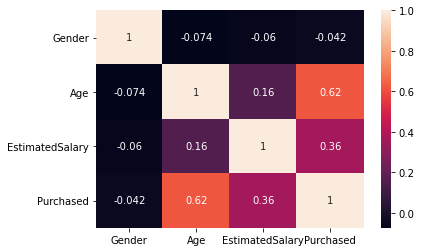

In [22]:
sns.heatmap(file.corr(),annot=True)

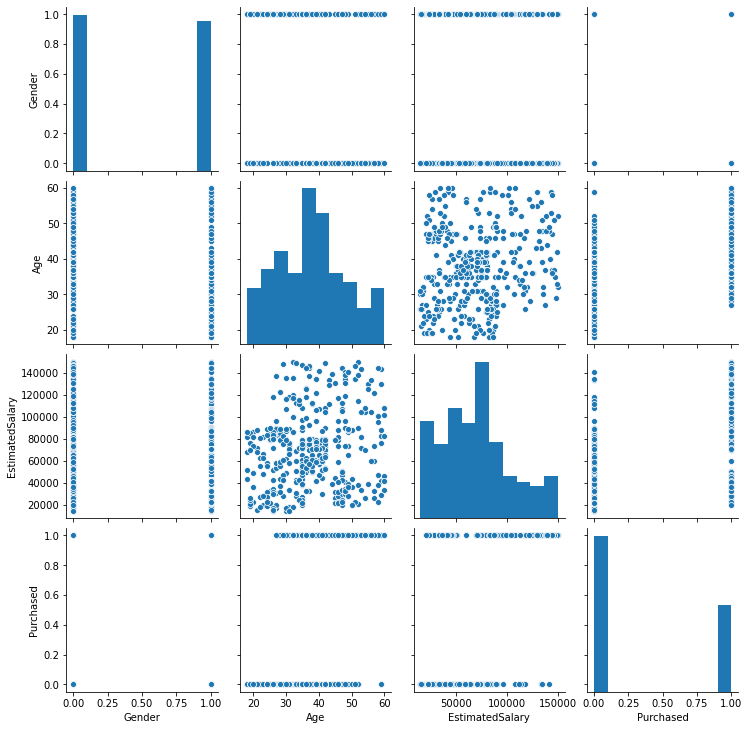

In [52]:
sns.pairplot(file)

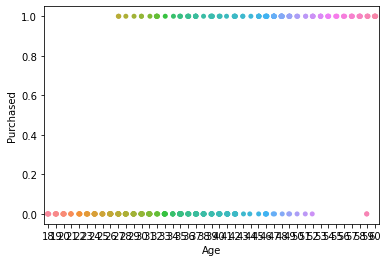

In [65]:
sns.stripplot(x='Age',y='Purchased',data=file)

In [96]:
x=file.drop('Purchased',axis=1)
y=file['Purchased']

In [155]:
from sklearn.model_selection import train_test_split as tts
xtrain,xtest,ytrain,ytest=tts(x,y,test_size=0.3)

In [218]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [219]:
trainpredicted=lr.predict(xtrain)

In [220]:
from sklearn.metrics import accuracy_score
accuracy_score(ytrain,trainpredicted)

0.9535714285714286

In [221]:
from sklearn.metrics import classification_report
print(classification_report(ytrain,trainpredicted))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       187
           1       0.94      0.91      0.93        93

    accuracy                           0.95       280
   macro avg       0.95      0.94      0.95       280
weighted avg       0.95      0.95      0.95       280



In [222]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytrain,trainpredicted)

array([[182,   5],
       [  8,  85]], dtype=int64)

In [223]:
predictedtest=dt.predict(xtest)

In [224]:
accuracy_score(ytest,predictedtest)

0.85

In [225]:
print(classification_report(ytest,predictedtest))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87        70
           1       0.83      0.80      0.82        50

    accuracy                           0.85       120
   macro avg       0.85      0.84      0.84       120
weighted avg       0.85      0.85      0.85       120



In [226]:
featurex=x.columns.to_list()

In [227]:
from sklearn import tree
text=tree.export_text(dt,feature_names=featurex,spacing=5)
print(text)

|----- Age <= 42.50
|     |----- EstimatedSalary <= 93000.00
|     |     |----- Age <= 36.50
|     |     |     |----- class: 0
|     |     |----- Age >  36.50
|     |     |     |----- EstimatedSalary <= 77500.00
|     |     |     |     |----- EstimatedSalary <= 67500.00
|     |     |     |     |     |----- class: 0
|     |     |     |     |----- EstimatedSalary >  67500.00
|     |     |     |     |     |----- Gender <= 0.50
|     |     |     |     |     |     |----- class: 0
|     |     |     |     |     |----- Gender >  0.50
|     |     |     |     |     |     |----- Age <= 39.50
|     |     |     |     |     |     |     |----- EstimatedSalary <= 70500.00
|     |     |     |     |     |     |     |     |----- class: 1
|     |     |     |     |     |     |     |----- EstimatedSalary >  70500.00
|     |     |     |     |     |     |     |     |----- class: 0
|     |     |     |     |     |     |----- Age >  39.50
|     |     |     |     |     |     |     |----- Age <= 40.50
|     |     